[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/melixxa07/AI-Project/blob/main/01%20-%20Data%20Exploration.ipynb)

# <font color ="royalblue"> <font face = 'Century'> -- **Spaceship Titanic** --

### <font face = 'Century'> **Contents** 
1. <font face = 'Century'> Cleaning Dataset
2. <font face = 'Century'> Dataset Preparation
3. <font face = 'Century'> Dataset Analysis
4. <font face = 'Century'> Model Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

<font face = 'Century'> Importing the datasets:

In [2]:
df_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR8_DpTfwF69EJD3UXNBYFobIwCI6MxwaxG5ig7FNc-CV3a5dxjrktgNOWYyh09F9suWW_0ppny-_EX/pub?gid=281139100&single=true&output=csv')
df_test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTzWR9KXTaF9YhUOx0U9EJFaPYpLrlXO-Gj1kZ6EAGE84FWUMezoZXzMCOQTediw7dx_UDnl5iNg5kd/pub?gid=1184477590&single=true&output=csv')

<font face = 'Century'> Let's check them a little bit:

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train.shape

(8693, 14)

## <font color ="royalblue"> <font face = 'Century' > Cleaning Dataset

<font face = 'Century'> Let's check the number of null or empty data:

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<font face = 'Century'> Let's fix them all.

In [10]:
# Cleaning Dataset
df_train = df_train.dropna(subset=['Name'])
df_train["Destination"].fillna("TRAPPIST-1e", inplace = True)
df_train["Cabin"].fillna(method='pad', inplace = True)
df_train["CryoSleep"].fillna(method='pad', inplace = True)
df_train["HomePlanet"].fillna("Earth", inplace = True)
df_train["Age"].fillna(method='pad', inplace = True)
df_train["VIP"].fillna(False, inplace = True)
df_train['RoomService'].fillna(df_train['RoomService'].mean(), inplace = True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].mean(), inplace = True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].mean(), inplace = True)
df_train['Spa'].fillna(df_train['Spa'].mean(), inplace = True)
df_train['VRDeck'].fillna(df_train['VRDeck'].mean(), inplace = True)


<font face = 'Century'> Reset of index values:

In [11]:
index = list(range(0, 8493))
df_train.index = index
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## <font color ="royalblue"> <font face = 'Century' >  Dataset Preparation

<font face = 'Century'> Let's create some functions to convert some of the columns as categorical variables.

> <font face = 'Century'>  **a.** The `Passenger` column is going to be devided by two different columns called `Group` and `ID` respectively:

In [12]:
def split_Passenger(d, col):
    
    Group = []
    Id= []
    
    for i in range(len(d[col])):
       split = d[col][i].split('_')
       Group.append(split[0])
       Id.append(split[1])
    
    d['Group'] = Group 
    d['ID'] = Id
    
    return d

><font face = 'Century'>  **b.**  `HomePlanet` and `Destination` columns are going to be devided by 3 different columns called by their unique elements:

In [13]:
def one_hot(d, col):
    
    df = [np.array(d[col] == i).astype(int) for i in d[col].unique()]
    
    count = 0
    for i in d[col].unique():
        d[i] = df[count]
        count += 1
        
    return d

> <font face = 'Century'> **c.**  `Name` column is going to be devided by two different columns called `Name` and `Last_Name` respectively:

In [14]:
def split_Name(d, col):
    
    Name = []
    Last_Name = []
    
    for i in range(len(d[col])):
       split = d[col][i].split(' ')
       Name.append(split[0])
       Last_Name.append(split[1])
    
    d['Name'] = Name
    d['Last_Name'] = Last_Name
    
    return d

><font face = 'Century'>  **d.**  `Cryosleep`, `VIP` and `Transported` columns are going to be created as a boolean column:

In [15]:
def T_F(d, col):
    
    df = d[col].values.astype(int)
    
    d.drop([col], axis = 1)
    
    d[col] = df
    
    return 

> <font face = 'Century'> **e.**  For all the `services`, categorical columns are going to be created according to the service taken by the passenger and will be called as `Cont_X`, where _X_ is the name of the service:

In [16]:
def taken_services(d, col):
    
    cont_service= (df_train[col].values > 0).astype(int)
    
    d['Cont_'+ col] = cont_service
    
    return d

> <font face = 'Century'> **f.**  The `Age` column will be devided by age ranges according to _older_, _adult_ and _young_ passengers:

In [17]:
def age_range(d, col):
    
    youth = (df_train[col].values <= 18).astype(int)
    adult = ((df_train[col].values > 18) & (df_train[col].values <= 60)).astype(int)
    older = (df_train[col].values > 60).astype(int)
    
    del(d['Age'])
    d['Youth'] = youth
    d['Adult'] = adult
    d['Older'] = older

    return d

<font face = 'Century'> **Applying all the functions above to the dataset :**

In [18]:
# Split for PassengerId and Name:
split_Passenger(df_train, 'PassengerId')
split_Name(df_train, 'Name').head()

# To one hot for HomePlanet and Destination columns:
one_hot(df_train, 'HomePlanet').head()
one_hot(df_train, 'Destination').head()

# Categorical column for CryoSleep, VIP and Transported:
T_F(df_train, 'CryoSleep')
T_F(df_train, 'VIP')
T_F(df_train, 'Transported')

# Categorical columns for services taken and not taken:
taken_services(df_train, 'RoomService')
taken_services(df_train, 'FoodCourt')
taken_services(df_train, 'ShoppingMall')
taken_services(df_train, 'Spa')
taken_services(df_train, 'VRDeck')

# Categorical columns for range of ages in Age column:
age_range(df_train, 'Age')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,...,0,0,1,1,1,1,1,0,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,...,0,0,1,1,0,1,1,0,1,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,...,0,0,0,1,1,1,1,0,1,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,...,0,0,1,1,1,1,1,1,0,0


<font face = 'Century'> Current columns:
> Number of columns = 30

In [19]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Group', 'ID', 'Last_Name', 'Europa', 'Earth', 'Mars',
       'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Cont_RoomService',
       'Cont_FoodCourt', 'Cont_ShoppingMall', 'Cont_Spa', 'Cont_VRDeck',
       'Youth', 'Adult', 'Older'],
      dtype='object')

## <font color ="royalblue"> <font face = 'Century' >  Dataset Analysis

- <font face = 'Century'> **Correlation Matrix**

<font face = 'Century'> Let's check the dataset correlations to see what kind of data can give us information:

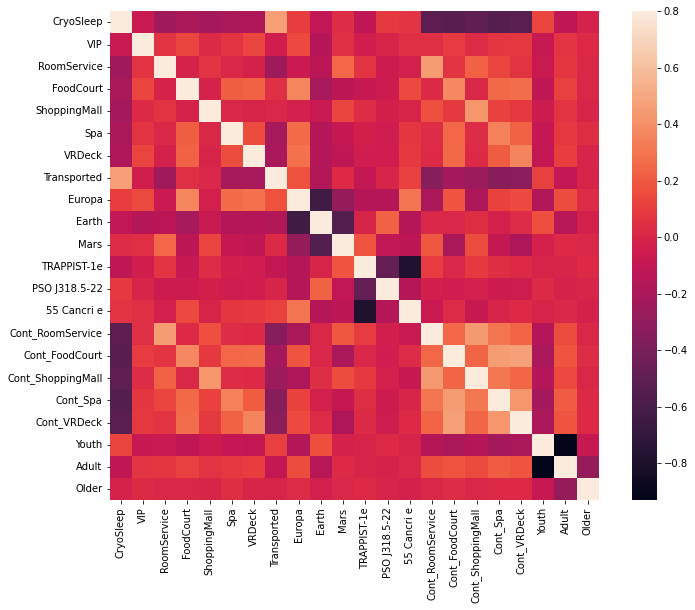

In [20]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

> <font face = 'Century'> _**Note:** The lightest pixels are those that have the highest correlation and the darkest do not give any information because there is no correlation between them._

<font face = 'Century'> As _`Transported`_ is the predictive variable it's row and column must be analyzed because we can see the correlated variables. From this, as seen in the matrix, the _`CryoSleep`_ is the one with the higest correlaiton so it can give us important information.

- <font face = 'Century'> **Histogram**

 <font face = 'Century'> Let's understand a little bit the data and how the information is distributed:

> <font face = 'Century'> _Destination:_

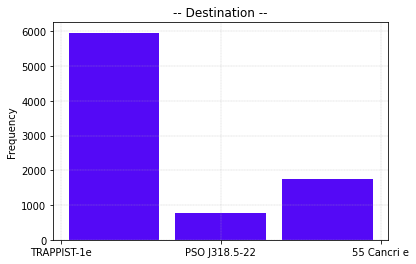

In [21]:
plt.hist(x=df_train['Destination'], bins=len(df_train.Destination.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- Destination --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.Destination.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3')
#5409F6
#9109F6

> <font face = 'Century'> _Home Planet:_

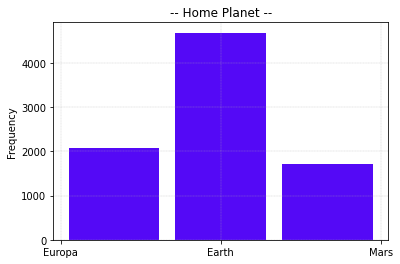

In [22]:
plt.hist(x=df_train['HomePlanet'], bins=len(df_train.HomePlanet.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- Home Planet --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.HomePlanet.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3')

> <font face = 'Century'> _VIP_

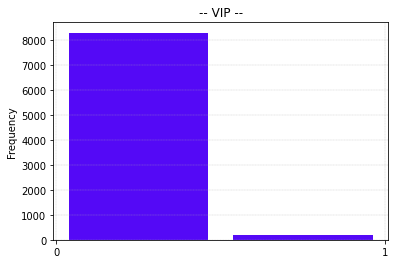

In [23]:
plt.hist(x=df_train['VIP'], bins=len(df_train.VIP.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- VIP --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.VIP.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3')

> <font face = 'Century'> _CryoSleep:_

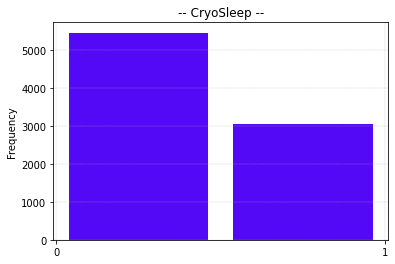

In [24]:
plt.hist(x=df_train['CryoSleep'], bins=len(df_train.CryoSleep.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- CryoSleep --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.CryoSleep.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3')

> <font face = 'Century'> _Transported:_

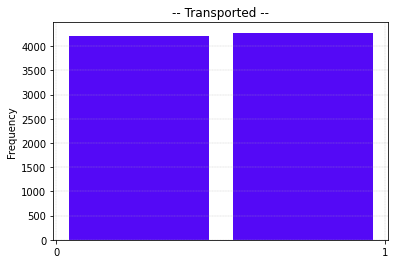

In [25]:
plt.hist(x=df_train['Transported'], bins=len(df_train.Transported.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- Transported --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.Transported.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3')

In [26]:
print('N° Transported Passengers = ',sum(df_train.Transported == 1))
print('N° Non-Transported Passengers = ',sum(df_train.Transported == 0))

N° Transported Passengers =  4277
N° Non-Transported Passengers =  4216


> <font face = 'Century'> _Age:_

<font face = 'Century'> Organizing the data in a list to be able to graph them and see the comparison:

In [27]:
age_list = []

for i in range(len(df_train)):
    if df_train.Youth[i] == 1:
        age_list.append('Youth')
        
    if df_train.Adult[i] == 1:
        age_list.append('Adult')
    
    if df_train.Older[i] == 1:
        age_list.append('Older')  
     
age_list = pd.DataFrame(age_list) 
age_list.head()

,0
0,Adult
1,Adult
2,Adult
3,Adult
4,Youth


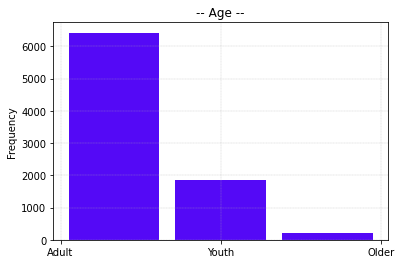

In [28]:
plt.hist(x=age_list, bins=3, color='#5409F6', rwidth=0.85,)
plt.title('-- Age --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,3)))
plt.grid(True, linestyle='--', linewidth='0.3')

> <font face = 'Century'> _Contracted Service:_

<font face = 'Century'> Organizing the data in a list to be able to graph them and see the comparison:

In [29]:
services_list = []

for i in range(len(df_train)):
    if df_train.Cont_RoomService[i] == 1:
        services_list.append('RoomService')
        
    if df_train.Cont_FoodCourt[i] == 1:
        services_list.append('FoodCourt')
    
    if df_train.Cont_ShoppingMall[i] == 1:
        services_list.append('ShoppingMall') 
        
    if df_train.Cont_Spa[i] == 1:
        services_list.append('Spa') 
        
    if df_train.Cont_VRDeck[i] == 1:
        services_list.append('VRDeck') 
     
services_list = pd.DataFrame(services_list) 
services_list.head()

,0
0,RoomService
1,FoodCourt
2,ShoppingMall
3,Spa
4,VRDeck


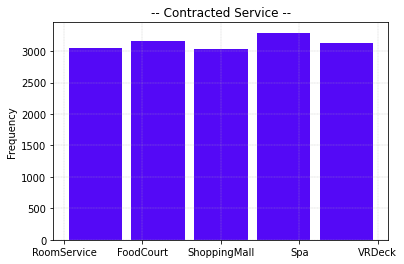

In [30]:
plt.hist(x=services_list, bins=5, color='#5409F6', rwidth=0.85,)
plt.title('-- Contracted Service --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,5)))
plt.grid(True, linestyle='--', linewidth='0.3')

> <font face = 'Century'> _**Note:** Remember that one passenger could take as many services as he/she wanted._

 <font face = 'Century'> Taking into account all these graphs and information above, let's analyze the correlation between `CryoSleep` and `Transported` variables:

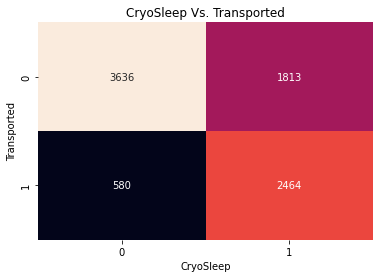

In [31]:
conf_matr = confusion_matrix(df_train.CryoSleep, df_train.Transported)
sns.heatmap(conf_matr ,annot=True,cbar=False, fmt="d")
plt.ylabel('Transported')
plt.xlabel('CryoSleep')
plt.title('CryoSleep Vs. Transported')
plt.show()

In [32]:
print('N° of passengers that WERE NOT in CryoSleep and WERE NOT transported =', sum((df_train.Transported==0)&(df_train.CryoSleep==0)))
print('N° of passengers that WERE in CryoSleep and WERE NOT transported =', sum((df_train.Transported==0)&(df_train.CryoSleep==1)))
print('N° of passengers that WERE in CryoSleep and WERE transported =', sum((df_train.Transported==1)&(df_train.CryoSleep==1)))
print('N° of passengers that WERE NOT in CryoSleep and WERE transported =', sum((df_train.Transported==1)&(df_train.CryoSleep==0)))

N° of passengers that WERE NOT in CryoSleep and WERE NOT transported = 3636
N° of passengers that WERE in CryoSleep and WERE NOT transported = 580
N° of passengers that WERE in CryoSleep and WERE transported = 2464
N° of passengers that WERE NOT in CryoSleep and WERE transported = 1813


 <font face = 'Century'> As can be seen, those passengers that were in CryoSleep were more likely to be transported to another dimension than those who weren't.

## <font color ="royalblue"> <font face = 'Century' >  Model Evaluation

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error

<font face = 'Century' > To start working we are going to crate a copy of `df_train` and save it into a new variable `df` to avoid modifying the original data and we are going to replace the index for `PassengerId` column.

In [34]:
df = df_train.copy()

In [35]:
df.index = df['PassengerId']
del[df['PassengerId']]

In [36]:
df

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
0002_01,Earth,0,F/0/S,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,...,0,0,1,1,1,1,1,0,1,0
0003_01,Europa,0,A/0/S,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,...,0,0,1,1,0,1,1,0,1,0
0003_02,Europa,0,A/0/S,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,1,1,1,1,0,1,0
0004_01,Earth,0,F/1/S,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,0,A/98/P,55 Cancri e,1,0.0,6819.0,0.0,1643.0,74.0,...,0,1,0,1,0,1,1,0,1,0
9278_01,Earth,1,G/1499/S,PSO J318.5-22,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
9279_01,Earth,0,G/1500/S,TRAPPIST-1e,0,0.0,0.0,1872.0,1.0,0.0,...,0,0,0,0,1,1,0,0,1,0


<font face = 'Century' >  As we are going to make predictions we need to delete all categorical columns that don't contribute to the prediction process. 

In [37]:
for col in df:
    if df[col].dtype == 'O':
        df = df.drop([col], axis=1)
df

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Earth,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
0002_01,0,0,109.0,9.0,25.0,549.0,44.0,1,0,1,...,0,0,1,1,1,1,1,0,1,0
0003_01,0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,...,0,0,1,1,0,1,1,0,1,0
0003_02,0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,...,0,0,0,1,1,1,1,0,1,0
0004_01,0,0,303.0,70.0,151.0,565.0,2.0,1,0,1,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
9278_01,1,0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9279_01,0,0,0.0,0.0,1872.0,1.0,0.0,1,0,1,...,0,0,0,0,1,1,0,0,1,0


<font face = 'Century' > Next, we divided the train dataframe into two groups, one for training that corresponds to the 70% of the total  and one for testing that corresponds to the missing 30%.

In [38]:
Xtr = df[[col for col in df.columns if col!= 'Transported']].values[:5945]
ytr = df['Transported'].values[:5945]

In [39]:
Xts = df[[col for col in df.columns if col!= 'Transported']].values[:2548]
yts = df['Transported'].values[:2548]

<font face = 'Century' > Finally, we have our dataset ready for training the model that we are going to define in the following steps.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

<font face = 'Century'> **Running different types of estimators:**

In [41]:
estimator_type = [RandomForestClassifier(n_estimators=5, max_depth=30), DecisionTreeClassifier(max_depth=2), 
                  Pipeline((("pca", PCA(n_components=2)), ("estimator", SVC(gamma = 1)))), SVC(gamma = 1)]
train_acc = []
test_acc = []

for i in estimator_type:
    estimator = i
    estimator.fit(Xtr,ytr)
    train_acc.append(round(estimator.score(Xtr,ytr), 2))
    test_acc.append(round(estimator.score(Xts,yts), 2))
    
    
    
    print(estimator)
    print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
    print ("test accuracy  %.2f"%estimator.score(Xts,yts),'\n')

RandomForestClassifier(max_depth=30, n_estimators=5)
train accuracy 0.89
test accuracy  0.88 

DecisionTreeClassifier(max_depth=2)
train accuracy 0.71
test accuracy  0.72 

Pipeline(steps=[('pca', PCA(n_components=2)), ('estimator', SVC(gamma=1))])
train accuracy 0.89
test accuracy  0.87 

SVC(gamma=1)
train accuracy 0.91
test accuracy  0.90 



<font face = 'Century'>  Let's visualize this results in a bar graph:

In [42]:
print(train_acc)
print(test_acc)

[0.89, 0.71, 0.89, 0.91]
[0.88, 0.72, 0.87, 0.9]


In [43]:
estimator_list = ['RFC', 'DTC', 'PL', 'SVC']

df_estimator = pd.DataFrame()
df_estimator['Train'] = train_acc
df_estimator['Test'] = test_acc
df_estimator.index = estimator_list
df_estimator = df_estimator.rename_axis('Estimator')
df_estimator

,Train,Test
Estimator,,
RFC,0.89,0.88
DTC,0.71,0.72
PL,0.89,0.87
SVC,0.91,0.90


In [44]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1.1,y_list[i-1],y_list[i-1], ha="right")
        
def add_value_label2(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-0.65,y_list[i-1],y_list[i-1], ha="right")

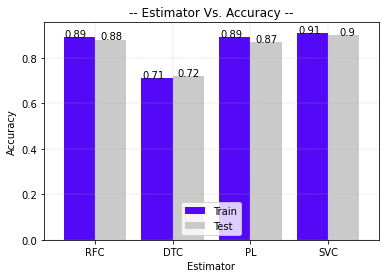

In [45]:
colors = ['#5409F6', '#CBCACA']
df_estimator.plot(kind = 'bar', width=0.8, color = colors, title = '-- Estimator Vs. Accuracy --')
plt.xticks(rotation= 0)
plt.legend(loc = 'lower center')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth='0.3')

add_value_label(estimator_list, df_estimator.Train)
add_value_label2(estimator_list, df_estimator.Test)


<font face = 'Century'> As we can see, the best perfomance gotten with an estimator is SVC. Let's see how the predictions were by means of a confusion matrix graph:

In [46]:
estimator = SVC(gamma=1)
estimator.fit(Xtr,ytr)

SVC(gamma=1)

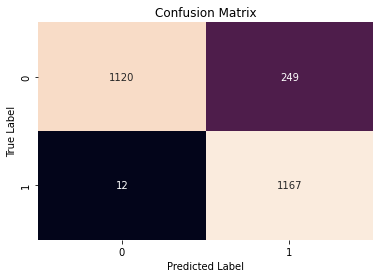

In [47]:
cm = confusion_matrix(yts, estimator.predict(Xts))
sns.heatmap(cm,annot=True,cbar=False, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()